In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


In [2]:
saved_model = tf.saved_model.load('.tmp/ssd_mobilenet_v2_coco_2018_03_29/saved_model')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [3]:
saved_model.signatures

_SignatureMap({'serving_default': <tensorflow.python.eager.wrap_function.WrappedFunction object at 0x144259190>})

In [4]:
handler = saved_model.signatures['serving_default']

In [6]:
INPUT_IMAGE_SIZE = 224

In [29]:
test_image_path = './images/01.jpg'
test_image = tf.keras.preprocessing.image.load_img(
    test_image_path,
    target_size=[INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE]
)

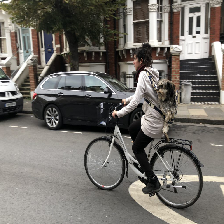

In [30]:
test_image

In [31]:
test_input = tf.keras.preprocessing.image.img_to_array(test_image)

In [32]:
test_input

array([[[243., 244., 236.],
        [209., 223., 208.],
        [ 93., 105., 103.],
        ...,
        [154., 148., 132.],
        [ 92.,  90.,  78.],
        [ 21.,  21.,  21.]],

       [[ 96.,  95.,  91.],
        [102., 108.,  94.],
        [131., 130., 126.],
        ...,
        [167., 161., 147.],
        [ 97.,  94.,  85.],
        [ 25.,  25.,  23.]],

       [[208., 207., 186.],
        [114., 115.,  81.],
        [244., 238., 214.],
        ...,
        [ 69.,  62.,  52.],
        [ 50.,  47.,  42.],
        [ 39.,  40.,  35.]],

       ...,

       [[187., 184., 177.],
        [176., 173., 166.],
        [171., 168., 161.],
        ...,
        [114., 111., 104.],
        [117., 114., 107.],
        [114., 111., 104.]],

       [[182., 179., 172.],
        [179., 176., 169.],
        [177., 174., 167.],
        ...,
        [115., 112., 105.],
        [112., 109., 102.],
        [109., 106.,  99.]],

       [[178., 175., 168.],
        [174., 171., 164.],
        [169., 1

In [33]:
test_input_tensor = tf.convert_to_tensor(
    test_input[tf.newaxis, ...],
    dtype=tf.dtypes.uint8
)

In [34]:
test_input_tensor

<tf.Tensor: shape=(1, 224, 224, 3), dtype=uint8, numpy=
array([[[[243, 244, 236],
         [209, 223, 208],
         [ 93, 105, 103],
         ...,
         [154, 148, 132],
         [ 92,  90,  78],
         [ 21,  21,  21]],

        [[ 96,  95,  91],
         [102, 108,  94],
         [131, 130, 126],
         ...,
         [167, 161, 147],
         [ 97,  94,  85],
         [ 25,  25,  23]],

        [[208, 207, 186],
         [114, 115,  81],
         [244, 238, 214],
         ...,
         [ 69,  62,  52],
         [ 50,  47,  42],
         [ 39,  40,  35]],

        ...,

        [[187, 184, 177],
         [176, 173, 166],
         [171, 168, 161],
         ...,
         [114, 111, 104],
         [117, 114, 107],
         [114, 111, 104]],

        [[182, 179, 172],
         [179, 176, 169],
         [177, 174, 167],
         ...,
         [115, 112, 105],
         [112, 109, 102],
         [109, 106,  99]],

        [[178, 175, 168],
         [174, 171, 164],
         [169, 166

In [35]:
result = handler(test_input_tensor)

In [36]:
result

{'detection_classes': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
 array([[ 1.,  2.,  3., 27.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]], dtype=float32)>,
 'num_detections': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.], dtype=float32)>,
 'detection_boxes': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
 array([[[0.1944195 , 0.48492932, 0.87618935, 0.7711532 ],
         [0.50102746, 0.37366685, 0.9216846 , 0.9054277 ],
         [0.3192209 , 0.12814039, 0.5884309 , 0.65142

In [57]:
num_detections = int(result['num_detections'].numpy()[0])
detection_classes = result['detection_classes'].numpy()[0]
detection_boxes = result['detection_boxes']
detection_scores = result['detection_scores'].numpy()[0][:num_detections]

In [47]:
num_detections

4

In [58]:
detection_classes

array([ 1.,  2.,  3., 27.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

In [52]:
detection_scores

array([0.9767438 , 0.9699137 , 0.9288199 , 0.45530686], dtype=float32)

In [59]:
!curl https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -o ./.tmp/coco.names

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   625  100   625    0     0   2729      0 --:--:-- --:--:-- --:--:--  2729


In [60]:
!cat ./.tmp/coco.names

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


In [61]:
classes = []
with open('./.tmp/coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [62]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [63]:
classes_array = np.array(classes)

In [64]:
classes_array.shape

(80,)

In [68]:
detection_classes

array([ 1.,  2.,  3., 27.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)